In [1]:
#Hand microbiota beta and alpha diversity analysis pre and post subway traveling
library(ggplot2)
library(vegan)
library(phyloseq)
library (ape)
library(phytools)
#install.packages("plotly")
library(plotly)

data= read.table("metadata_R117.txt", header=T, row.names=1, sep="\t")#las muestras en los metadatos deben de estar en el mismo orden en el que estan en la tabla de OTUs
load("RData/metro.RData")
load("RData/rmetro6242.RData")
load("RData/grmetro.RData")
grmetro

metro
rmetro6242->rmetro
human=subset_samples(rmetro, biome=="human")


Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”Warning message:
“package ‘vegan’ was built under R version 3.5.2”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.5.2”Loading required package: lattice
This is vegan 2.5-5
Loading required package: maps

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 75907 taxa and 89 samples ]
sample_data() Sample Data:       [ 89 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 75907 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 75907 tips and 75906 internal nodes ]

In [2]:
#Top 10 genera
#no lavadas pre travelling
human=subset_samples(grmetro, biome=="human")
#human=subset_samples(rmetro, biome=="human")
urban_transf<-transform_sample_counts(human, function(OTU) OTU/sum(OTU))

#sucias_pre=subset_samples(urban_transf, limpieza=="No_lavadas_pre_viaje")
#sucias_pre=subset_samples(urban_transf, limpieza=="No_lavadas_post_viaje")
sucias_pre=subset_samples(urban_transf, limpieza=="Lavadas_pre_viaje")
#sucias_pre=subset_samples(urban_transf, limpieza=="Lavadas_post_viaje")

                                     
po=names(sort(taxa_sums(sucias_pre), TRUE)[1:10])
tax_table(sucias_pre)[po]

ot=otu_table(sucias_pre)[po]
ot
po=apply(ot,1 ,mean)
po
                                
tax=tax_table(sucias_pre)
to=as.data.frame(cbind(po,tax))


#po1
vec=order(as.numeric(as.character(to$po)), decreasing=T)
#to[vec,]


,Kingdom,Phylum,Class,Order,Family,Genus,Species
669,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Moraxellaceae,g__Acinetobacter,NA
833895,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Corynebacteriaceae,g__Corynebacterium,NA
796,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,NA
755094,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Propionibacteriaceae,g__Propionibacterium,NA
1245,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,NA
609348,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__[Weeksellaceae],g__Chryseobacterium,NA
704732,k__Bacteria,p__Bacteroidetes,c__Cytophagia,o__Cytophagales,f__Cytophagaceae,g__Adhaeribacter,NA
1173,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Halomonadaceae,g__Halomonas,NA
2782,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Aeromonadales,f__Aeromonadaceae,g__,NA
615359,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__[Weeksellaceae],g__Wautersiella,NA


,LA5,LA3,LA2,LA1
669,0.50656841,0.023069529,0.281960910,0.105414931
833895,0.01954502,0.188401153,0.057353412,0.116789491
796,0.02803589,0.125600769,0.031079782,0.142582506
755094,0.07721884,0.160365268,0.065363665,0.012976610
1245,0.04645947,0.096443448,0.086350529,0.062319769
609348,0.01425825,0.004806152,0.230374880,0.000000000
704732,0.00000000,0.000000000,0.000000000,0.091477091
1173,0.00000000,0.084428068,0.000000000,0.000000000
2782,0.03700737,0.037968600,0.003684716,0.000000000
615359,0.01986543,0.022108299,0.022428709,0.008651073


669     833895        796     755094       1245     609348     704732 
0.22925344 0.09552227 0.08182474 0.07898110 0.07289330 0.06235982 0.02286927 
      1173       2782     615359 
0.02110702 0.01966517 0.01826338

Warning message in cbind2(argl[[i]], r):
“number of rows of result is not a multiple of vector length (arg 1)”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1524205 
Run 1 stress 0.1574431 
Run 2 stress 0.1563628 
Run 3 stress 0.1561945 
Run 4 stress 0.1664076 
Run 5 stress 0.1543754 
Run 6 stress 0.1571685 
Run 7 stress 0.1496532 
... New best solution
... Procrustes: rmse 0.03761294  max resid 0.1455316 
Run 8 stress 0.1615777 
Run 9 stress 0.1645212 
Run 10 stress 0.1488408 
... New best solution
... Procrustes: rmse 0.04477552  max resid 0.2278093 
Run 11 stress 0.1583506 
Run 12 stress 0.1522594 
Run 13 stress 0.1618049 
Run 14 stress 0.162472 
Run 15 stress 0.1638939 
Run 16 stress 0.164964 
Run 17 stress 0.1554986 
Run 18 stress 0.1564279 
Run 19 stress 0.1580606 
Run 20 stress 0.1650109 
*** No convergence -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    19: stress ratio > sratmax


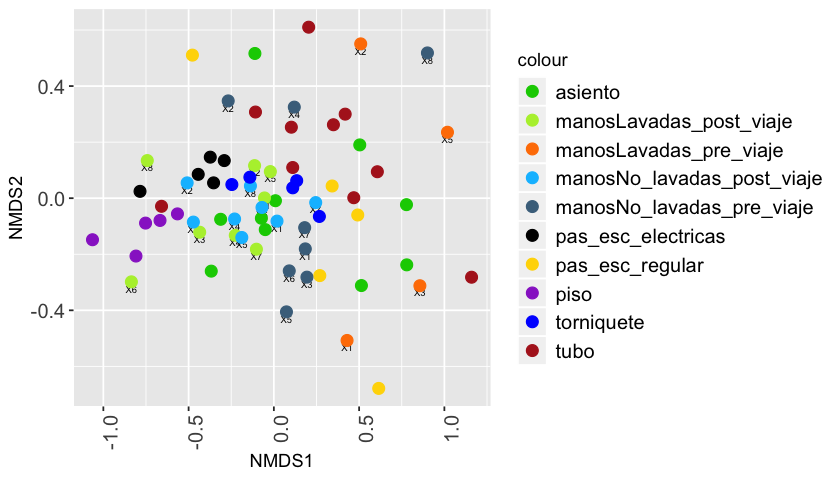

In [3]:
po=subset_samples(grmetro, site=="y"| biome=="human")
po
ordu = ordinate(po, "NMDS", "bray", weighted=F)
options(repr.plot.width=7, repr.plot.height=4)

p = plot_ordination(po, ordu, label="host_subject_id") 
p = p + geom_point(aes(color = surf_manos), size=3 )
p = p + scale_colour_manual(values = c( "green3","olivedrab2", "darkorange1",
                        "deepskyblue", "skyblue4", "black","gold1", "darkorchid", "blue", "firebrick","gray60",
                                      "pink","gray","gray4", "gray3"))+#, 
                        #labels = c("Asiento (N=10)", "Manos (N=8)", "Pas. escal. eléctricas (N=5)", 
                         #                       "Pas. escal. regulares (N=5)", "Piso (N=5)","Torniquete (N=5)",
                          #                      "Tubo (N=10)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))

p

Warning message:
“Ignoring unknown aesthetics: label”Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Warning message:
“Removed 8 rows containing missing values (geom_path).”

,Df,SumOfSqs,F,Pr(>F)
train_travelling,1,0.3097925,2.395537,0.008
host_subject_id,7,1.0937909,1.208282,0.238
Residual,3,0.3879621,NA,NA


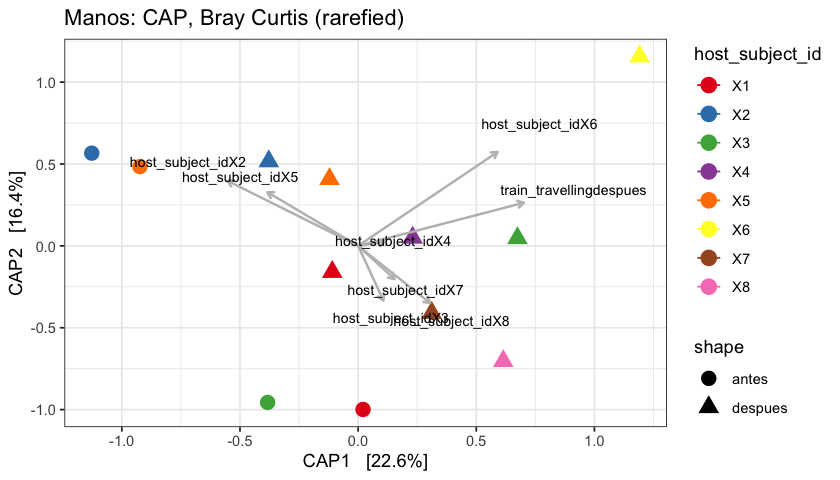

In [4]:
human=subset_samples(grmetro, biome=="human")

sucias=subset_samples(human, limpieza=="Lavadas_post_viaje"|limpieza=="Lavadas_pre_viaje")

metroCAP_bray <- ordinate(sucias, method = "CAP", distance = "bray", ~ train_travelling+host_subject_id+limpieza)


#save(metroCAP_bray,file="metroCAP_bray.RData") 
#load("metroCAP_bray.RData")
#pdf("plot/manos_cap_gr_host_lavadas.pdf", width=6, height=4)

cap_plot <- plot_ordination(sucias, metroCAP_bray, color="host_subject_id",axes =c(1,2))+ 
           geom_point(aes(shape = train_travelling), size=4, alpha=1)+ 
            #geom_point(aes(colour = train_travelling), alpha = 0.05) +
            stat_ellipse(type = "t", level = 0.95) +
            theme_bw()
arrowmat <- vegan::scores(metroCAP_bray, display="bp")
arrowdf <- data.frame(labels=rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, yend = CAP2, x = 0, y = 0, shape = NULL, color = NULL, label = labels)
label_map <- aes(x = 1.3 * CAP1, y = 1.3 * CAP2, shape = NULL, color = NULL, label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))
#plot
options(repr.plot.width=7, repr.plot.height=4)

#mycol=c("gray", "darkgoldenrod1", "darkseagreen", "darkorchid", "darkolivegreen1", "lightskyblue", "darkgreen", "deeppink", "khaki2", "firebrick", "brown1", "darkorange1", "cyan1", "royalblue4", "darksalmon", "blue2","darkseagreen", "green")
cap_plot  + 
    geom_segment(mapping = arrow_map, size = .7, data = arrowdf, color = "gray", arrow = arrowhead) + 
    geom_text(mapping = label_map, size = 3,  data = arrowdf, show.legend = FALSE)+
    scale_colour_brewer(type="qual", palette="Set1")+
labs(title="Manos: CAP, Bray Curtis (rarefied)")


#dev.off()
an_cap_otus_wunifrac <- anova(metroCAP_bray, by="term",permutations=999)
an_cap_otus_wunifrac



Warning message:
“Ignoring unknown aesthetics: label”Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Warning message:
“Removed 8 rows containing missing values (geom_path).”

,Df,SumOfSqs,F,Pr(>F)
train_travelling,1,0.1632859,2.291582,0.011
host_subject_id,7,1.4907681,2.988814,0.001
Residual,7,0.4987825,NA,NA


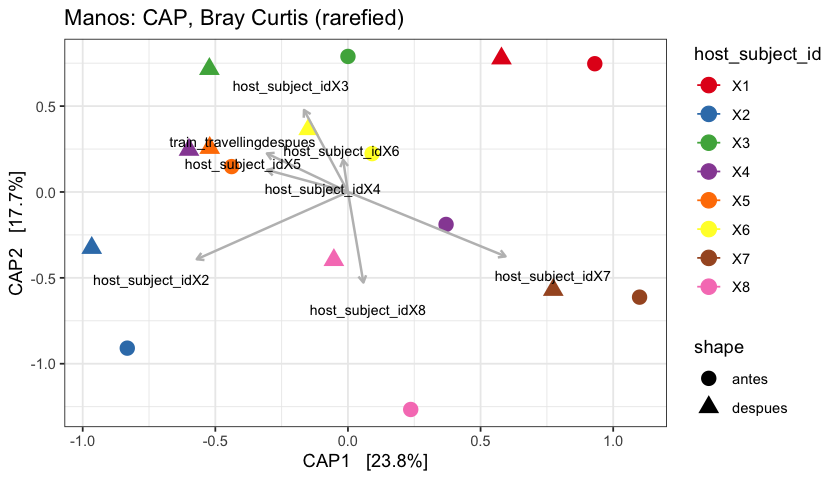

In [5]:
human=subset_samples(grmetro, biome=="human")
sucias=subset_samples(human, limpieza=="No_lavadas_post_viaje"|limpieza=="No_lavadas_pre_viaje")


metroCAP_bray <- ordinate(sucias, method = "CAP", distance = "bray", ~ train_travelling+host_subject_id+limpieza)
# touched_turnstile+touched_vertical_handrail+ touched_floor+touched_horizontal_handrail+touched_scalator_handrail+touched_stairs_handrail+touched_chair+

#save(metroCAP_bray,file="metroCAP_bray.RData") 
#load("metroCAP_bray.RData")
#pdf("plot/manos_cap_gr_host_lavadas.pdf", width=6, height=4)

cap_plot <- plot_ordination(sucias, metroCAP_bray, color="host_subject_id",axes =c(1,2))+ 
           geom_point(aes(shape = train_travelling), size=4, alpha=1)+ 
            #geom_point(aes(colour = train_travelling), alpha = 0.05) +
            stat_ellipse(type = "t", level = 0.95) +
            theme_bw()
arrowmat <- vegan::scores(metroCAP_bray, display="bp")
arrowdf <- data.frame(labels=rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, yend = CAP2, x = 0, y = 0, shape = NULL, color = NULL, label = labels)
label_map <- aes(x = 1.3 * CAP1, y = 1.3 * CAP2, shape = NULL, color = NULL, label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))
#plot
options(repr.plot.width=7, repr.plot.height=4)

#mycol=c("gray", "darkgoldenrod1", "darkseagreen", "darkorchid", "darkolivegreen1", "lightskyblue", "darkgreen", "deeppink", "khaki2", "firebrick", "brown1", "darkorange1", "cyan1", "royalblue4", "darksalmon", "blue2","darkseagreen", "green")
cap_plot  + 
    geom_segment(mapping = arrow_map, size = .7, data = arrowdf, color = "gray", arrow = arrowhead) + 
    geom_text(mapping = label_map, size = 3,  data = arrowdf, show.legend = FALSE)+
    scale_colour_brewer(type="qual", palette="Set1")+
labs(title="Manos: CAP, Bray Curtis (rarefied)")


#dev.off()
an_cap_otus_wunifrac <- anova(metroCAP_bray, by="term",permutations=999)
an_cap_otus_wunifrac



In [6]:
summary(an_cap_otus_wunifrac)

       Df       SumOfSqs            F             Pr(>F)      
 Min.   :1   Min.   :0.1633   Min.   :2.292   Min.   :0.0010  
 1st Qu.:4   1st Qu.:0.3310   1st Qu.:2.466   1st Qu.:0.0035  
 Median :7   Median :0.4988   Median :2.640   Median :0.0060  
 Mean   :5   Mean   :0.7176   Mean   :2.640   Mean   :0.0060  
 3rd Qu.:7   3rd Qu.:0.9948   3rd Qu.:2.815   3rd Qu.:0.0085  
 Max.   :7   Max.   :1.4908   Max.   :2.989   Max.   :0.0110  
                              NA's   :1       NA's   :1       

Warning message:
“Removed 48 rows containing missing values (geom_errorbar).”

[1] 16 83

$observed_6230
[1] 0.01571435

$chao1_6230
[1] 0.02086258

$shannon_6230
[1] 0.01171869

$simpson_6230
[1] 0.09289194

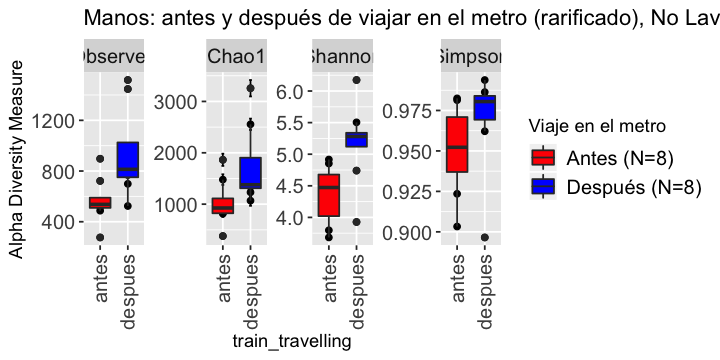

In [7]:
sample_data(human)$limpieza = factor(sample_data(human)$limpieza, levels = c("No_lavadas_pre_viaje","No_lavadas_post_viaje","Lavadas_pre_viaje","Lavadas_post_viaje"))
human_no_lav=subset_samples(rmetro, limpieza!="Lavadas_pre_viaje"&limpieza!="Lavadas_post_viaje")

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="plot/alpha_boxplots_otu_level.pdf", width=6,height=4,useDingbats=FALSE) 

plot_richness(human_no_lav, x = "train_travelling", 
              measures = c("Chao1","Observed", "Shannon","Simpson"))+
geom_boxplot(aes(fill = train_travelling))+
scale_fill_manual(values = c( "red", "blue",
"gold1", "forestgreen", "firebrick", "mediumspringgreen", "darkorange1"), 
                       name="Viaje en el metro",
                       labels = c("Antes (N=8)","Después (N=8)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))+
labs(title="Manos: antes y después de viajar en el metro (rarificado), No Lavadas")
#dev.off()

tub=subset(data, biome=="human")#& time_group!="0h")
tub=subset(tub, limpieza!="Lavadas_pre_viaje"&limpieza!="Lavadas_post_viaje")#& time_group!="0h")
dim(tub)
lapply(tub[,7:10], function(x) {
  k=kruskal.test(x ~ tub$train_travelling)
  pv=k$p.value
  return(pv)
})


Warning message:
“Removed 36 rows containing missing values (geom_errorbar).”

[1] 12 83

$observed_6230
[1] 0.006578414

$chao1_6230
[1] 0.006578414

$shannon_6230
[1] 0.006578414

$simpson_6230
[1] 0.01084595

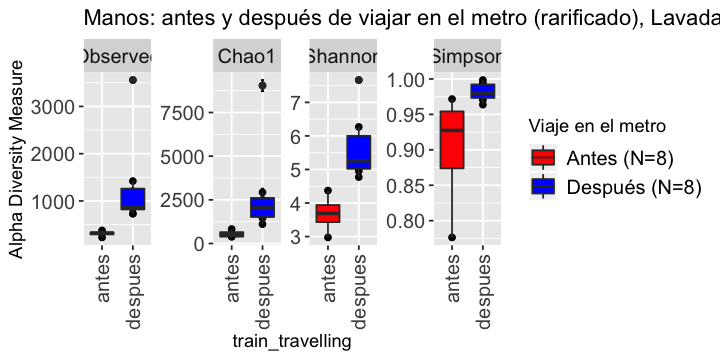

In [8]:
sample_data(human)$limpieza = factor(sample_data(human)$limpieza, levels = c("No_lavadas_pre_viaje","No_lavadas_post_viaje","Lavadas_pre_viaje","Lavadas_post_viaje"))
human_no_lav=subset_samples(rmetro, limpieza!="No_lavadas_pre_viaje"&limpieza!="No_lavadas_post_viaje")

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="plot/alpha_boxplots_otu_level_lavadas.pdf", width=6,height=4,useDingbats=FALSE) 

plot_richness(human_no_lav, x = "train_travelling", 
              measures = c("Chao1","Observed", "Shannon","Simpson"))+
geom_boxplot(aes(fill = train_travelling))+
scale_fill_manual(values = c( "red", "blue",
"gold1", "forestgreen", "firebrick", "mediumspringgreen", "darkorange1"), 
                       name="Viaje en el metro",
                       labels = c("Antes (N=8)","Después (N=8)"))+
theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text=element_text(size=12),
      legend.text=element_text(size=12),strip.text.x = element_text(size = 12))+
labs(title="Manos: antes y después de viajar en el metro (rarificado), Lavadas")
#dev.off()

tub=subset(data, biome=="human")
tub=subset(tub, limpieza!="No_lavadas_pre_viaje"&limpieza!="No_lavadas_post_viaje")#& time_group!="0h")
dim(tub)
lapply(tub[,7:10], function(x) {
  k=kruskal.test(x ~ tub$train_travelling)
  pv=k$p.value
  return(pv)
})


In [9]:
#taxa
human=subset_samples(rmetro, biome=="human")

sample_data(human)$limpieza = factor(sample_data(human)$limpieza, levels = c("Lavadas_pre_viaje","Lavadas_post_viaje"))
human_no_lav=subset_samples(human, limpieza!="No_lavadas_pre_viaje"&limpieza!="No_Lavadas_post_viaje")

sexa=merge_samples(human_no_lav, "SampleID", fun=sum)
sexa_transf<-transform_sample_counts(sexa, function(OTU) OTU/sum(OTU))
sexa_transf
#install.packages("tidyverse")
library(tidyverse)
sexa_genus <- tax_glom(sexa_transf, taxrank = 'Genus')
sexa_genus # should list # taxa as # phyla
sexa_g_genus<- psmelt(sexa_genus) # create dataframe from phyloseq object
#save(sexa_g_genus,file="sexa_g_genus.RData")
#load("sexa_g_genus.RData")  
sexa_g_genus$Genus <- as.character(sexa_g_genus$Genus) #convert to character
#simple way to rename phyla with < 1% abundance
sexa_g_genus$Genus[sexa_g_genus$Abundance < 0.01] <- "< 1% abund."
#Count # phyla to set color palette
Count = length(unique(sexa_g_genus$Genus))
Count


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29690 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 29690 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29690 tips and 29689 internal nodes ]

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.3       ✔ forcats 0.4.0  
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘tidyr’ was built under R version 3.5.2”Warning message:
“package ‘purrr’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”Warning message:
“package ‘stringr’ was built under R version 3.5.2”Warning message:
“package ‘forcats’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks plotly::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ .GlobalEnv::map() masks purrr::map(), maps::map()


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 934 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 83 sample variables ]
tax_table()   Taxonomy Table:    [ 934 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 934 tips and 933 internal nodes ]

[1] 54